In [430]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
from scipy import stats
import datetime


def duplicates_by(df, columns):
    return df[df.duplicated(subset=columns,keep=False)].sort_values(columns)


%matplotlib inline
#os.chdir('/Users/flatironschooldc3/FlatironSchoolRepo/dc-ds-111819/module-1/project/unzipped_data')
os.chdir('/Users/flatironschooldc/Code/LearnCo/dc-ds-111819/module-1/project/data/')

In [502]:
#Rotten Tomatoes
rtm = pd.read_csv("rt.movie_info.tsv", sep='\t') 

# TheMovieDB (TMDB)
tmdbm = pd.read_csv("tmdb.movies.csv")
tmdbb = pd.read_csv("tn.movie_budgets.csv")


In [503]:
#-investigation commands-
#tmdbm.isna().sum()
#tmdbb.isna().sum()

#tmdbm.original_language.value_counts()


#-flag outliers-

# z = np.abs(stats.zscore(tmdbb[col]))
#     threshold = 4.26 #this corresponds to a probability below 1:10,000
#     outliers = np.where(z>threshold)

#-look at duplicates-
#tmdbb.loc[tmdbb['id']==100]
#duplicates_by(tmdbm,['title'])
#duplicates_by(tmdbb,['title'])
#duplicates_by(tmdbm,['title','release_date'])
#duplicates_by(tmdbb,['title','release_date'])

#-format of merge column-
#tmdbb.release_date.head()
#tmdbm.release_date.head()

#print(tmdbb.sort_values('title').title.head(25))
#print(tmdbm.sort_values('title').title.head(25))

#tmdbb[tmdbb['title'].str.contains("Potter")]
#tmdbm[tmdbm['title'].str.contains("Potter")]

#-confirm merge-
#tmd['_merge'].value_counts()

#Cleaning commands

#remove duplicates
'''
There are 5 duplicates in tmdbm by title & release_date, all v. small movies   
'''
tmdbm.drop_duplicates(subset=['title','release_date'], inplace=True)
tmdbb.drop_duplicates(inplace=True)

#drop pointless cols
del_cols = ['Unnamed: 0','genre_ids'] 
for col in del_cols:
    del tmdbm[col]

#flag title changes
tmdbm['title_change'] = tmdbm['original_title'] != tmdbm['title']

#rename columns
tmdbb.rename(columns={'movie':'title'},inplace=True)

#convert dollars to numeric and flag outliers
for col in ['production_budget','domestic_gross','worldwide_gross']:
    tmdbb[col] = tmdbb[col].apply(lambda x:float(x[1:].replace(',','')))
    
#standardize dates
tmdbb['release_date'] = pd.to_datetime(tmdbb['release_date'],infer_datetime_format=True)
tmdbm['release_date'] = pd.to_datetime(tmdbm['release_date'],infer_datetime_format=True)
    
#calculate ROI variables
tmdbb['domestic_roi']  = ((tmdbb['domestic_gross']  - tmdbb['production_budget']) / tmdbb['production_budget']) 
tmdbb['worldwide_roi'] = ((tmdbb['worldwide_gross'] - tmdbb['production_budget']) / tmdbb['production_budget']) 


tmd = pd.merge(tmdbb,tmdbm,on=['title','release_date'],indicator=False,validate="1:1")
tmd.to_csv('tmd.csv')

KeyError: ('Unnamed: 0', 'genre_ids')

In [429]:
#do some sanity checks
tmd['worldwide_roi'].describe()

count     1270.000000
mean       306.458972
std       1335.217754
min       -100.000000
25%         -8.710975
50%        122.732514
75%        303.014455
max      41556.474000
Name: worldwide_roi, dtype: float64

In [354]:
tmd['domestic_roi'].describe()

count     1270.000000
mean       108.407656
std        730.713906
min       -100.000000
25%        -61.459725
50%         -3.238680
75%        101.678240
max      22664.410000
Name: domestic_roi, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


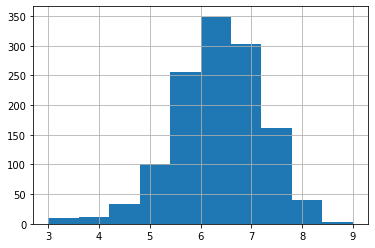

In [435]:
print(tmd['vote_average'].hist())

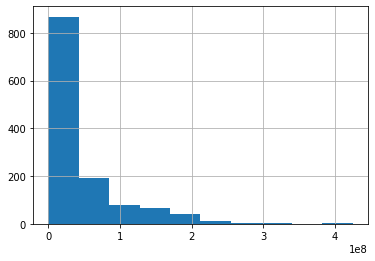

In [441]:
tmd['production_budget'].hist()

In [426]:
tmd_test = tmd[['production_budget',
                'domestic_gross',
                'worldwide_gross',
                'domestic_roi',
                'worldwide_roi',
                'popularity',
                'vote_average',
                'vote_count']]
tmd_test.corr()

,production_budget,domestic_gross,worldwide_gross,domestic_roi,worldwide_roi,popularity,vote_average,vote_count
production_budget,1.000000,0.723722,0.796485,-0.088761,-0.052125,0.618293,0.170412,0.657029
domestic_gross,0.723722,1.000000,0.942370,0.059798,0.089948,0.616461,0.315010,0.790509
worldwide_gross,0.796485,0.942370,1.000000,0.021066,0.073495,0.638779,0.287215,0.790356
domestic_roi,-0.088761,0.059798,0.021066,1.000000,0.986319,0.018369,0.015318,0.037421
worldwide_roi,-0.052125,0.089948,0.073495,0.986319,1.000000,0.056300,0.028488,0.082226
popularity,0.618293,0.616461,0.638779,0.018369,0.056300,1.000000,0.352290,0.690631
vote_average,0.170412,0.315010,0.287215,0.015318,0.028488,0.352290,1.000000,0.429410
vote_count,0.657029,0.790509,0.790356,0.037421,0.082226,0.690631,0.429410,1.000000


In [461]:
imdbom = pd.read_csv('imdbom.csv')
imdbom.head()

,Unnamed: 0,title,year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,0,#1 Serial Killer,2013.0,87.0,Horror,5.6,40.0,NaN,NaN,0.0
1,2,#5,2018.0,87.0,Documentary,6.5,49.0,NaN,NaN,0.0
2,3,#50Fathers,2015.0,132.0,Comedy,6.5,49.0,NaN,NaN,0.0
3,4,#66,2015.0,116.0,Action,5.3,18.0,NaN,NaN,0.0
4,5,#82 Summits,2015.0,50.0,Documentary,6.5,49.0,NaN,NaN,0.0


In [504]:

tmd['year'] = tmd['release_date'].apply(lambda x: x.year) #add a year column for merge

films = pd.merge(imdbom,tmd,on=['title','year'],how='inner',indicator=False,validate="1:1")
for col in ['Unnamed: 0','id_x','id_y','domestic_gross_y']:
    del films[col]

films.to_csv